# 2. 지도학습 알고리즘 (분류, 회귀 알고리즘)

## [연습문제]

### 1-1. 다음은 인도 벵갈루루의 집값 데이터이다. 데이터는 집의 특징을 나타내는 입력 변수들과 집값의 출력 변수로 구성되어 있다. 데이터 컬럼 정의서는 아래와 같을 때, 선형 회귀 분석을 수행하시오. (데이터 링크는 아래 코드 참조)

In [37]:
import pandas as pd
import statsmodels.formula.api as smf
df = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice8_BHP2.csv')
df

,area_type,availability,size,total_sqft,bath,balcony,price
0,Super,0,3,1056.0,2,1,39.07
1,Plot,1,6,2600.0,5,3,120.00
2,Super,1,5,1521.0,3,1,95.00
3,Super,1,3,1170.0,2,1,38.00
4,Plot,1,6,2785.0,5,3,295.00
...,...,...,...,...,...,...,...
7490,Super,1,5,1345.0,2,1,57.00
7491,Super,1,5,1715.0,3,3,112.00
7492,Built-up,1,8,3453.0,4,0,231.00
7493,Built-up,1,3,1141.0,2,1,60.00


In [38]:
def resume(df):
    print(df.shape)
    tmp = pd.DataFrame()
    tmp['dtypes'] = df.dtypes
    tmp['isna'] = df.isna().sum()
    tmp['nunique'] = df.nunique()
    tmp['1st'] = df.iloc[0,:]
    tmp['2nd']= df.iloc[1,:]
    return tmp
resume(df)    

(7495, 7)


,dtypes,isna,nunique,1st,2nd
area_type,object,0,4,Super,Plot
availability,int64,0,2,0,1
size,int64,0,15,3,6
total_sqft,float64,0,1573,1056.0,2600.0
bath,int64,0,8,2,5
balcony,int64,0,4,1,3
price,float64,0,1517,39.07,120.0


In [39]:
# 스텐다드스케일링
from sklearn.preprocessing import StandardScaler, RobustScaler
# 입력 변수(X)와 출력 변수(y) 분리
data= pd.get_dummies(df, columns=['area_type'], drop_first = True, dtype=float)

X = data.drop('price', axis=1)
y = data['price']

def scales(df):
    cols = df.columns
    scaler = StandardScaler()
    X_ = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(X_, columns=cols)
    cols = df_scaled.columns
    return df_scaled, cols

In [40]:
# OLS 모델 생성 및 학습
formula = 'price~' + '+'.join(data.columns.difference(['price']).tolist())
model = smf.ols(formula, data = data).fit()

# 모델 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     1017.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:16:19   Log-Likelihood:                -42786.
No. Observations:                7495   AIC:                         8.559e+04
Df Residuals:                    7486   BIC:                         8.565e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -59.2399      3.826  

### 1-2. 앞선 모델에서 변수 area_type과 total_sqft의 교호작용항을 추가하여 회귀분석을 수행하시오.

In [41]:
import statsmodels.formula.api as smf

model = smf.ols('price~total_sqft+bath+area_type_Plot+area_type_Plot:total_sqft',data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     2396.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:16:19   Log-Likelihood:                -42455.
No. Observations:                7495   AIC:                         8.492e+04
Df Residuals:                    7490   BIC:                         8.496e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -57.3097      2.448    -23.408      0.000     -62.109     -52.510
total_sqft                    0.0403      0.001     33.105      0.000       0.038       0.043
bath                         36.7242      1.207     30.420      0.000      34.358      39.091
area_type_Plot              -93.7325      8.105    -11.565      0.000    -109.620     -77.845
area_type_Plot:total_sqft     0.0683      0.003     26.372      0.000       0.063       0.073
==============================================================================
Omnibus:                    11166.346   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         23411187.102
Skew:                           8.440   Prob(JB):                         0.00
Kurtosis:                     276.278   Cond. No.                     1.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 모형의 설명력(R-squared)은 0.561로 개선
- F 통계량(2396)을 보면 전체 모형이 통계적으로 유의미함

- 회귀계수 : total_sqft, bath, area_type_Plot:total_sqft 상호작용항은 유의수준 5%에서 유의한 양의 값을, area_type_Plot는 유의한 음의 값
- condition number가 1.79e+04로 매우 높아 다중공선성 문제
- 잔차분석 결과 정규성 가정을 만족하지 않음 (Jarque-Bera 통계량)

- area_type_Plot 변수와 상호작용항의 영향을 자세히 살펴볼 필요, 모형 개선을 위해서는 변수 변환, 이상치 제거 등의 방법을 고려

### 1-3. 앞선 모델에서 변수 total_sqft의 이차항을 추가하여 회귀분석을 수행하시오.

In [42]:
# total_sqft 이차항 추가
data['total_sqft_sq'] = data['total_sqft']**2
data_scaled, cols = scales(data.drop('price', axis=1))
data[cols] = data_scaled
                           
# 회귀식 작성
formula = 'price ~ bath+total_sqft+area_type_Plot+total_sqft_sq+ area_type_Plot:total_sqft'
# 회귀분석 수행
model = sm.ols(formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     2891.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:16:20   Log-Likelihood:                -41514.
No. Observations:                7495   AIC:                         8.304e+04
Df Residuals:                    7489   BIC:                         8.308e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

- 제곱을 추가해줌으로서 비선형관계를 더 잘 설명할 수 있게 되었음. 물론 유의하지만 다중공선성의 문제는 더 심해짐

### 1-4. 앞선 모델에서 변수 선택 과정을 거쳐 최종 모델을 완성하고 결과를 해석하시오.

<Axes: >

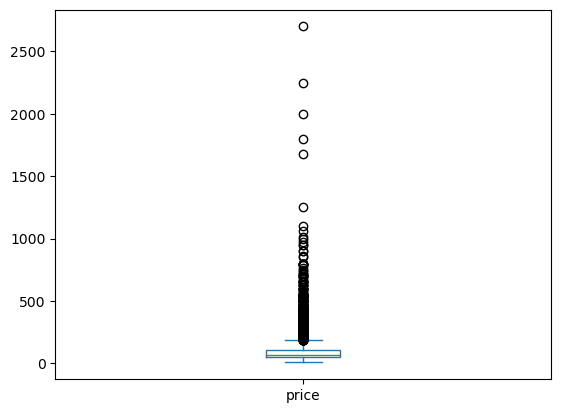

In [43]:
data['price'].plot(kind='box')

In [44]:
import numpy as np
data['log_price'] = np.log(data['price'])
data

,availability,size,total_sqft,bath,balcony,price,area_type_Carpet,area_type_Plot,area_type_Super,total_sqft_sq,log_price
0,-1.787227,-0.720924,-0.478974,-0.520148,-0.807622,39.07,-0.083585,-0.19257,0.495618,-0.095254,3.665355
1,0.559526,1.421269,1.174833,2.884665,1.756175,120.00,-0.083585,5.19292,-2.017682,0.171460,4.787492
2,0.559526,0.707205,0.019096,0.614790,-0.807622,95.00,-0.083585,-0.19257,0.495618,-0.038636,4.553877
3,0.559526,-0.720924,-0.356867,-0.520148,-0.807622,38.00,-0.083585,-0.19257,0.495618,-0.083264,3.637586
4,0.559526,1.421269,1.372990,2.884665,1.756175,295.00,-0.083585,5.19292,-2.017682,0.218531,5.686975
...,...,...,...,...,...,...,...,...,...,...,...
7490,0.559526,0.707205,-0.169421,-0.520148,-0.807622,57.00,-0.083585,-0.19257,0.495618,-0.062469,4.043051
7491,0.559526,0.707205,0.226893,0.614790,1.756175,112.00,-0.083585,-0.19257,0.495618,-0.008973,4.718499
7492,0.559526,2.849398,2.088497,1.749727,-2.089520,231.00,-0.083585,-0.19257,-2.017682,0.415417,5.442418
7493,0.559526,-0.720924,-0.387929,-0.520148,-0.807622,60.00,-0.083585,-0.19257,-2.017682,-0.086431,4.094345


In [45]:
# 회귀식 작성
formula = 'log_price ~ bath+total_sqft+area_type_Plot+total_sqft_sq+ area_type_Plot:total_sqft'
# 회귀분석 수행
model = sm.ols(formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     3950.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:16:21   Log-Likelihood:                -2502.9
No. Observations:                7495   AIC:                             5018.
Df Residuals:                    7489   BIC:                             5059.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

- 모형의 설명력(R-squared)은 0.725로 향상
- F통계량(3950)을 보아 통계적으로 매우 유의미

- 회귀계수 : bath, total_sqft, area_type_Plot는 유의한 양의 값, total_sqft_sq와 area_type_Plot:total_sqft 상호작용항은 유의한 음의 값
- 조건지수(9.20)로 보아 다중공선성 문제는 크지 않습니다.


- Jarque-Bera 통계량은 여전히 0.00으로 나와 정규성 가정을 만족하지는 않지만, 이전 모형에 비해 개선
- 잔차의 왜도(0.068)와 첨도(6.510)가 상당히 개선되어 정규분포에 가까움
- 완전한 정규성 가정 만족을 위해서는 추가적인 변환이나 모형 적합이 필요 전반적으로 설명력이 높고 다중공선성 문제도 없어 해석에 무리가 없음

## [기출문제]
## 1. 야구 득점 데이터
### 1-1. 각 회차별로 1번 타자의 출루(1,2,3루타와 사사구(볼넷, 몸에맞는공))가 있는 경우에 대해 득점이 발생 했는지 확인하고자 한다. 이를 위한 전처리를 수행하라. (단, 첫 번째 혹은 두 번째 타자가 홈런을 친 경우 해당 회차 데이터는 제외한다.)

- ADP 29회 기출문제: https://www.datamanim.com/dataset/ADPpb/00/29.html
- 데이터 출처 : https://www.kaggle.com/datasets/pschale/mlb-pitch-data-20152018 데이터를 후처리
- 데이터 설명 : A 야구구단의 시합 결과 중 일부를 나타낸다. 각 행은 하나의 경기를 의미(game_id)하며 9회차(= 9이닝) 동안 1번타자, 2번타자의 출루 정보를 의미한다. 각 컬럼에 대한 설명은 아래 이미지와 같으며, value값의 index는 이미지의 ‘수치 의미’ 열을 통해 확인 할 수 있다.  
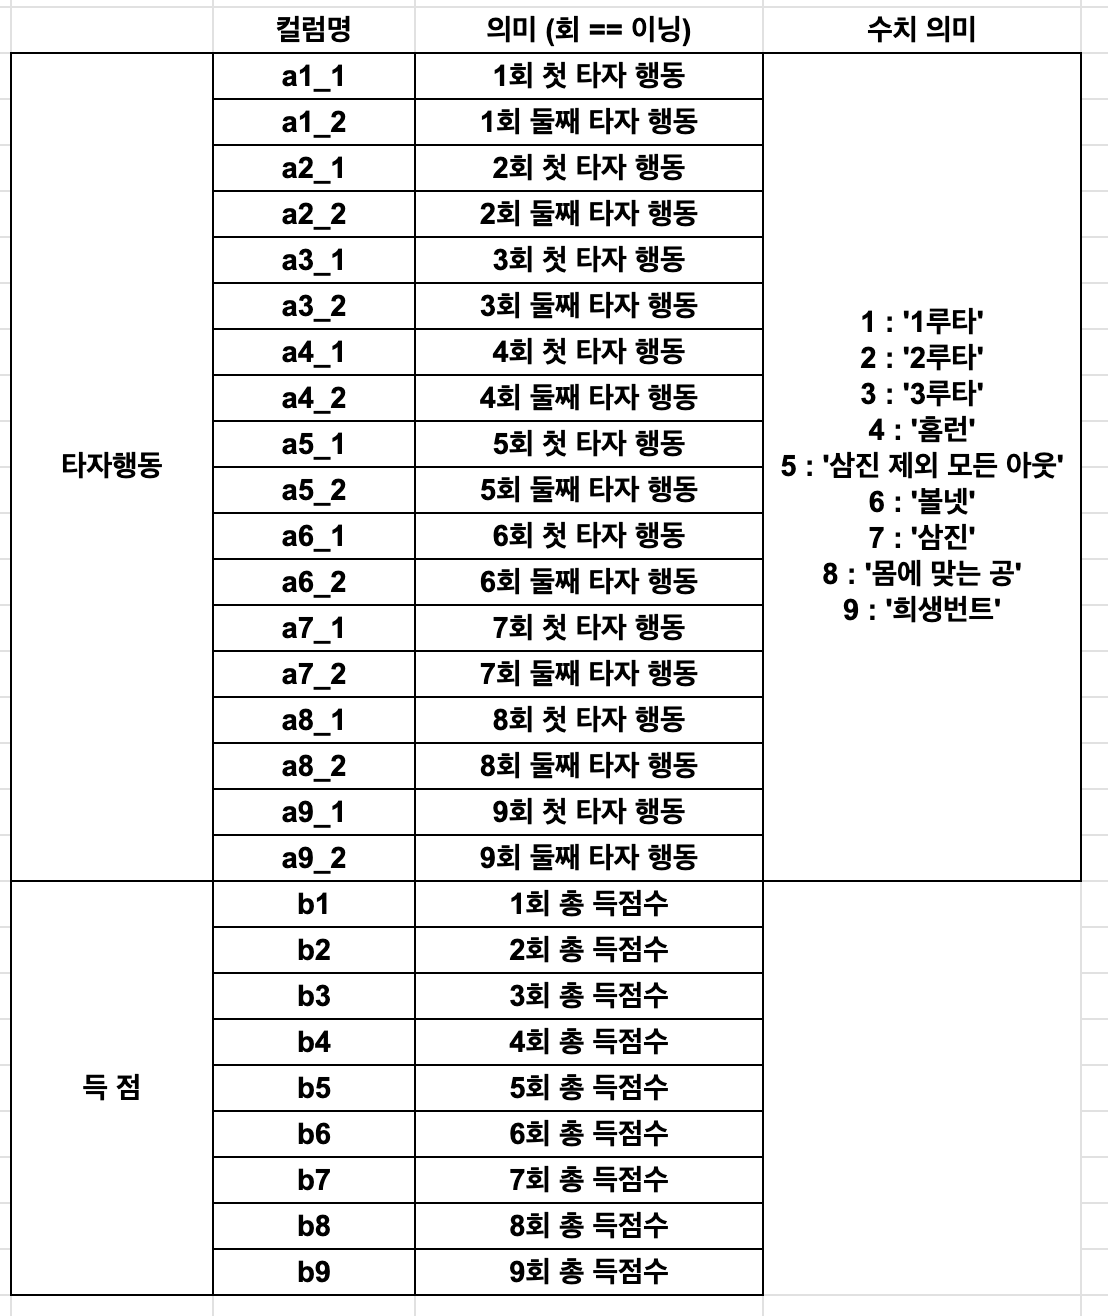

In [8]:
import pandas as pd
import numpy as np
df_raw = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p2_.csv')

run = pd.DataFrame(np.array(df_raw.iloc[:, 1:19]).reshape(-1, 2), columns = ['seq_1','seq_2'])
score = pd.DataFrame(np.array(df_raw.iloc[:,19:]).reshape(-1, 1), columns = ['score'])
inning = pd.DataFrame(np.array([range(1, 10)] * 200).reshape(-1, 1), columns = ['inning'])
game_id = pd.DataFrame(np.repeat(df_raw.game_id, 9), columns = ['game_id']).reset_index(drop = True )

df = pd.concat([game_id, inning, run, score], axis = 1)

In [9]:
'''
각 회차별로 1번 타자의 출루(1,2,3루타와 사사구(볼넷, 몸에맞는공))가 있는 경우에 대해 득점이 발생 했는지 확인하고자 한다.
이를 위한 전처리를 수행하라. (단, 첫 번째 혹은 두 번째 타자가 홈런을 친 경우 해당 회차 데이터는 제외한다.)
'''
# 1,2,3루타와 사사구 : 1,2,3,6
# 홈런 : 4
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   game_id  1800 non-null   int64 
 1   inning   1800 non-null   int32 
 2   seq_1    1800 non-null   object
 3   seq_2    1800 non-null   object
 4   score    1800 non-null   int64 
dtypes: int32(1), int64(2), object(2)
memory usage: 63.4+ KB


In [10]:
# (1,2,3루타와 사사구(볼넷, 몸에맞는공))가 있는 경우
X = [1,2,3,6,8]
res1 = df[(df['seq_1'] !=4)&(df['seq_2'] !=4)] # 홈런을 경우 해당 회차의 데이터는 제외
res = res1[res1['seq_1'].isin(X)]
print(res)

        game_id  inning seq_1 seq_2  score
7     201900016       8     1     1      4
8     201900016       9     1     5      2
11    201900023       3     2     5      0
13    201900023       5     6     5      0
17    201900023       9     2     7      0
...         ...     ...   ...   ...    ...
1778  201902373       6     1     5      1
1781  201902373       9     1     5      0
1784  201902392       3     1     5      2
1795  201902394       5     6     7      0
1796  201902394       6     2     9      4

[305 rows x 5 columns]


### 1-2. 데이터에 대해 Logistic Regression을 적용하고 2번타자의 희생번트 여부에 대한 회귀 계수 검정을 하라

In [11]:
res.loc[:,'score'] = res['score'].apply(lambda x: 1 if x>=1 else 0)  # 로지스틱 회귀를 위해서는 종속변수를 이진변수로 변환 필요
res

,game_id,inning,seq_1,seq_2,score
7,201900016,8,1,1,1
8,201900016,9,1,5,1
11,201900023,3,2,5,0
13,201900023,5,6,5,0
17,201900023,9,2,7,0
...,...,...,...,...,...
1778,201902373,6,1,5,1
1781,201902373,9,1,5,0
1784,201902392,3,1,5,1
1795,201902394,5,6,7,0


In [12]:
import statsmodels.formula.api as smf

formula = 'score~'+'+'.join(res.columns.difference(['game_id','score']))
model = smf.logit(formula, data=res).fit(method='bfgs')
print(model.summary())

         Current function value: 0.602412
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                           Logit Regression Results                           
Dep. Variable:                  score   No. Observations:                  305
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                           11
Date:                Sun, 07 Apr 2024   Pseudo R-squ.:                  0.1194
Time:                        06:42:11   Log-Likelihood:                -183.74
converged:                      False   LL-Null:                       -208.65
Covariance Type:            nonrobust   LLR p-value:                 6.743e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1713      0.521      2.249      0.024       0.151       2.1

E:\miniconda\envs\tw311\Lib\site-packages\scipy\optimize\_optimize.py:1397: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
E:\miniconda\envs\tw311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


- 305개의 관측치, 자유도 11개를 갖는 모델로서, p-value는 6.743e-07로 통계적인 의미를 가진다 할 수 있다
- 2번타자의 희생번트 (seq_2[T.9]) 는  pvalue 0.169로 0.05의 유의수준을 채택하지 못한다.
- 2번타자의 희생번트와 스코어는 유의한 상관관계가 있다고 보기어렵다

### 1-3. SMOTE (random_state =0 지정)를 적용하여 data imbalance를 해결하라

In [13]:
for c in res.columns: 
    res.loc[:,c] = res[c].astype(float)

In [14]:
res.iloc[:,-1].value_counts() # 불균형한 데이터임을 확인

score
1    173
0    132
Name: count, dtype: int64

In [15]:
X = res[['inning',	'seq_1'	,'seq_2']]
y = res['score']

In [20]:
# 해당 데이터의 클래스 분포를 살펴보면 아래와 같이 불균형 상태임을 알 수 있다.
print(y.value_counts())

# 이처럼 클래스 불균형 상태에서 데이터를 학습할 경우, 데이터 수가 적은 클래스의 분포를 적절히 학습하지 못하고 다수 클래스에 과대 적합 되어 대부분의 데이터를 다수 클래스로 분류하는 문제가 발생하기도 한다. 이에 데이터의 수가 부족한 클래스의 데이터 수를 늘리는 오버샘플링을 통해 data imbalance를 해결하고자 한다. 여기서는 오버샘플링 방법 중에서도 SMOTE를 적용하기로 한다.
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0, k_neighbors=5)
X2, y2 = os.fit_resample(X, y)
print(y2.value_counts())

score
1    173
0    132
Name: count, dtype: int64
score
1    173
0    173
Name: count, dtype: int64


In [24]:
res2 = pd.concat([X2,y2],axis=1)

### 1-4. 구성 데이터에 Logistic Regression을 적용하고 결과를 분석하라

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y)
lg = LogisticRegression()
lg.fit(X_train,y_train)
pred = lg.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.33      0.23      0.27        26
           1       0.53      0.66      0.59        35

    accuracy                           0.48        61
   macro avg       0.43      0.44      0.43        61
weighted avg       0.45      0.48      0.45        61



In [34]:
print(confusion_matrix(y_test,pred))

[[ 6 20]
 [12 23]]


- 모델의 정확도는 48% 수준으로 성능이 떨어져서 사용이 어렵다고 할 수 있다
- 특히 스코어를 내지 못한 경우에 스코어를 냈다고 하는 1종 오류가 많이 발생하였다. 
- SMOTE의 경우 이웃하는 점을 생성하게 되는데, 타자데이터의 경우 0~9가 연속하는 데이터가 아니므로 새로생성한 데이터에서 해석상의 오류가 발생하게되어, 편향이 발생하는 것으로 보인다.
- 각 변수 별 회귀계수 확인을 위해 statsmodels를 확인하였다

In [35]:
import statsmodels.formula.api as smf

formula = 'score~'+'+'.join(res2.columns.difference(['score']))
model = smf.logit(formula, data=res2).fit(method='bfgs')
print(model.summary())

         Current function value: 0.588969
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                           Logit Regression Results                           
Dep. Variable:                  score   No. Observations:                  346
Model:                          Logit   Df Residuals:                      318
Method:                           MLE   Df Model:                           27
Date:                Sun, 07 Apr 2024   Pseudo R-squ.:                  0.1503
Time:                        07:02:26   Log-Likelihood:                -203.78
converged:                      False   LL-Null:                       -239.83
Covariance Type:            nonrobust   LLR p-value:                 5.615e-06
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.2471    

E:\miniconda\envs\tw311\Lib\site-packages\scipy\optimize\_optimize.py:1397: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
E:\miniconda\envs\tw311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


- No. Observations: 총 346개의 관측치가 사용
- Pseudo R-squ.: 유사 R-제곱 값은 0.1503으로, 모델의 설명력이 그리 높지 않음.
- converged: 모델이 수렴하지 않음(False). 이는 최적의 계수 추정치를 찾지 못했음을 의미.
> 결론 : 전반적으로 모델이 수렴하지 않았고, 대부분의 계수가 통계적으로 유의미하지 않음.
이는 독립변수들이 종속변수(score)를 잘 설명하지 못함을 의미. 모델 개선을 위해 다른 독립변수를 고려하거나, 데이터를 다시 검토할 필요가 있음

## 2. 대구 영구임대아파트 퇴거여부 데이터
- ADP 29회 기출문제: https://www.datamanim.com/dataset/ADPpb/00/29.html
- 데이터 출처 : https://www.data.go.kr/data/15094266/fileData.do 후처리
- 데이터 설명 : 대구도시공사_빅데이터_영구임대아파트 입주자 퇴거여부 데이터, 고유번호를 가진 계약자와 특정 아파트에 대해 매년 퇴거여부를 기록한 데이터

In [25]:
from pandas import read_csv
apart = read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p1.csv', encoding='euc-kr')
resume(apart)

(86904, 23)


,dtypes,isna,nunique,1st,2nd
순번,int64,0,10472,1,1
계약구분,object,508,2,유효,유효
재계약횟수,int64,0,12,10,10
거주개월,int64,0,298,222,222
아파트 이름,object,0,5,강남아파트,강남아파트
아파트 ID,int64,0,5,5,5
아파트 평점,float64,1225,4,7.0,7.0
호실고유번호,int64,0,5866,14520,14520
층,int64,0,15,1,1
평형대,int64,0,3,12,12


In [58]:
import matplotlib
matplotlib.rc('font', family='Malgun Gothic')  # or 'NanumGothic'

### 2-1. 계약자고유번호를 기준으로 거주연도 별 여러개의 데이터가 쌓여 있다. 각 계약자고유번호에 대해 가장 최신의 거주연도 행만 남겨라.

In [27]:
apart = apart[[ '계약자고유번호', '거주연도', '순번', '계약구분', '재계약횟수', '거주개월', '아파트 이름', '아파트 ID', '아파트 평점', '호실고유번호',
       '층', '평형대', '계약서고유번호', '입주연도', '퇴거연도','월세(원)',
       '보증금(원)', '대표나이', '나이', '성별', '결혼여부', '거주자 수', '퇴거여부']]

In [28]:
apart.sort_values(['계약자고유번호', '거주연도'], ascending=[True, False]) # 계약자별, 거주년도 순으로 정렬

,계약자고유번호,거주연도,순번,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,...,입주연도,퇴거연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
85372,1,2012,12673,해지,4,88,지산5단지아파트,3,8.0,85369,...,2005,2012.0,77300,5302000,44,35,남,기혼,2,퇴거
85371,1,2011,12673,해지,4,88,지산5단지아파트,3,8.0,85369,...,2005,2012.0,77300,5302000,44,34,남,기혼,2,미퇴거
85370,1,2010,12673,해지,4,88,지산5단지아파트,3,8.0,85369,...,2005,2012.0,62500,4290000,44,33,남,기혼,2,미퇴거
85369,1,2009,12673,해지,4,88,지산5단지아파트,3,8.0,85369,...,2005,2012.0,62500,4290000,44,32,남,기혼,2,미퇴거
85368,1,2008,12673,해지,4,88,지산5단지아파트,3,8.0,85369,...,2005,2012.0,52100,3575000,44,31,남,기혼,2,미퇴거
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,86892,2012,1506,유효,10,234,비둘기아파트,1,5.0,7782,...,2002,NaN,40400,1964000,44,35,남,미혼,2,미퇴거
10352,86892,2011,1506,유효,10,234,비둘기아파트,1,5.0,7782,...,2002,NaN,39200,1907000,44,34,남,미혼,2,미퇴거
10351,86892,2010,1506,유효,10,234,비둘기아파트,1,5.0,7782,...,2002,NaN,39200,1907000,44,33,남,미혼,2,미퇴거
10350,86892,2009,1506,유효,10,234,비둘기아파트,1,5.0,7782,...,2002,NaN,39200,1907000,44,32,남,미혼,2,미퇴거


In [29]:
res = apart.sort_values(['계약자고유번호', '거주연도'], ascending=[True, False]).drop_duplicates('계약자고유번호', keep='first') # 제일 위의 열만 남기고 삭제
res

,계약자고유번호,거주연도,순번,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,...,입주연도,퇴거연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
85372,1,2012,12673,해지,4,88,지산5단지아파트,3,8.0,85369,...,2005,2012.0,77300,5302000,44,35,남,기혼,2,퇴거
85427,6,2016,12683,해지,7,174,지산5단지아파트,3,8.0,85421,...,2001,2016.0,48600,2144000,32,27,남,미혼,1,퇴거
85587,14,2020,12702,유효,10,237,지산5단지아파트,3,8.0,85576,...,2001,NaN,81600,5598000,67,66,남,미혼,1,미퇴거
86190,27,2020,12789,유효,10,227,지산5단지아파트,3,8.0,86179,...,2002,NaN,66600,3116000,61,60,남,기혼,3,미퇴거
86235,40,2020,12796,유효,10,222,지산5단지아파트,3,8.0,86224,...,2003,NaN,129240,8865600,58,57,여,미혼,2,미퇴거
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,86866,2020,29,유효,1,9,강남아파트,5,7.0,15103,...,2020,NaN,42800,2078000,69,68,남,미혼,1,미퇴거
25,86867,2020,4,유효,1,8,강남아파트,5,7.0,14546,...,2020,NaN,38000,2078000,66,65,남,미혼,1,미퇴거
56928,86868,2020,8511,유효,6,133,용지아파트,2,7.0,56917,...,2010,NaN,43600,2052000,55,54,남,미혼,1,미퇴거
54074,86879,2020,8119,유효,10,222,용지아파트,2,7.0,54063,...,2003,NaN,42400,2052000,42,41,여,미혼,1,미퇴거


### 2-2. EDA 및 결측치 처리 (시각화 포함)

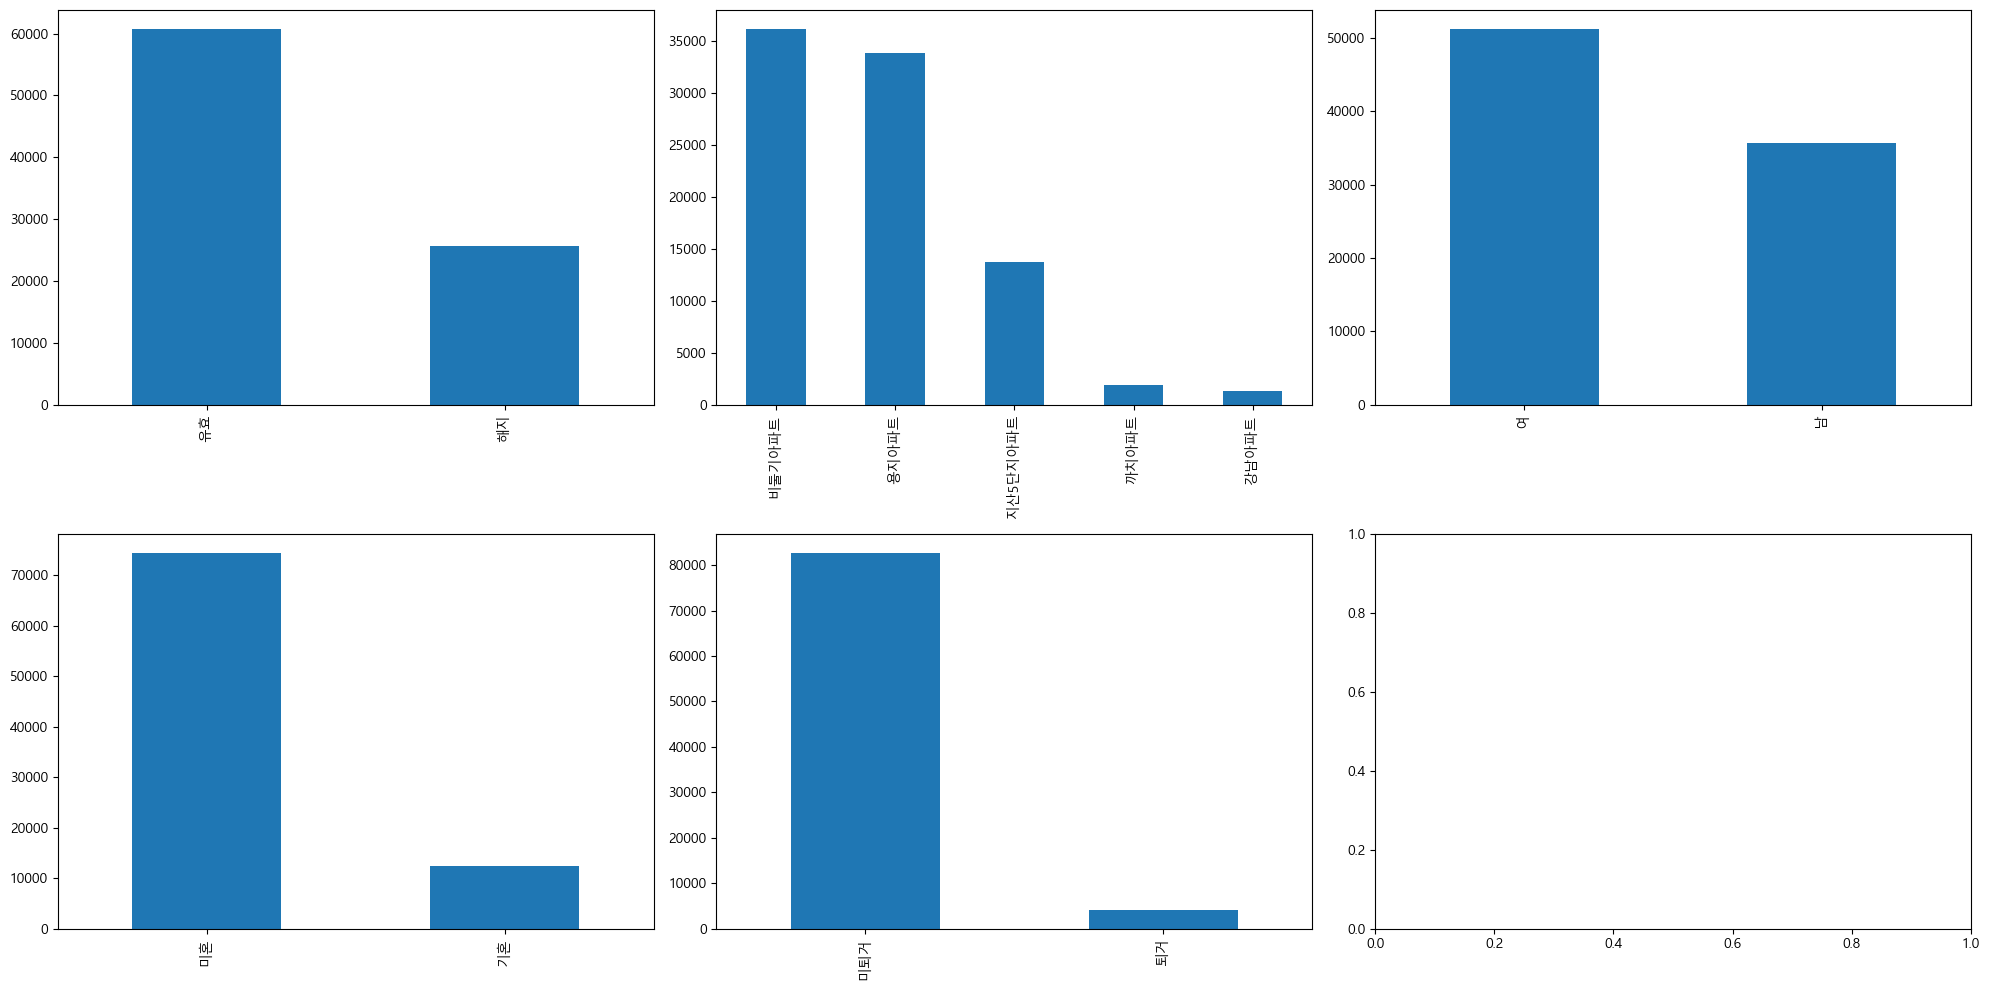

In [38]:
import matplotlib.pyplot as plt
cat = apart.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(2,len(cat)//2+1, figsize=(20, 10))  # Create a figure and an array of axes

for ax, c in zip(axes.flat, cat):
    apart[c].value_counts().plot(kind='bar', ax=ax)  # Plot on the corresponding axis

plt.tight_layout()  # Adjust spacing between subplots
plt.show();

In [31]:
apart.describe().round().T

,count,mean,std,min,25%,50%,75%,max
계약자고유번호,86904.0,43448.0,25088.0,1.0,21721.0,43446.0,65175.0,86892.0
거주연도,86904.0,2014.0,4.0,2008.0,2011.0,2014.0,2017.0,2020.0
순번,86904.0,6491.0,3745.0,1.0,3241.0,6547.0,9711.0,12883.0
재계약횟수,86904.0,7.0,3.0,1.0,5.0,8.0,10.0,12.0
거주개월,86904.0,174.0,65.0,1.0,126.0,197.0,222.0,323.0
아파트 ID,86904.0,2.0,1.0,1.0,1.0,2.0,2.0,5.0
아파트 평점,85679.0,6.0,1.0,5.0,5.0,7.0,7.0,10.0
호실고유번호,86904.0,43445.0,25088.0,1.0,21724.0,43425.0,65170.0,86891.0
층,86904.0,8.0,4.0,1.0,4.0,8.0,12.0,15.0
평형대,86904.0,13.0,2.0,12.0,12.0,12.0,15.0,19.0


In [40]:
import seaborn as sns
num = apart.select_dtypes('number').columns
# sns.pairplot(apart[num]);

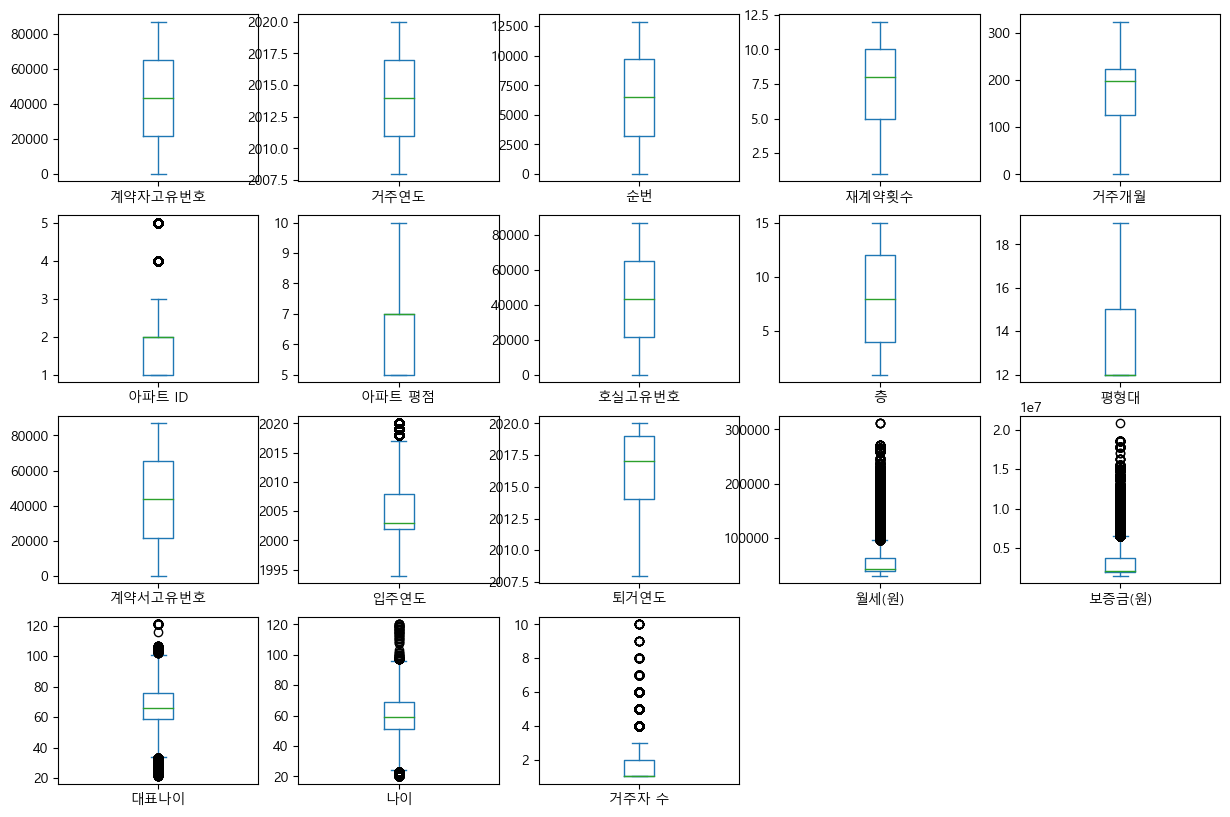

In [41]:
apart[num].plot(kind = 'box', subplots = True, layout = (4,5), figsize = (15, 10));

In [42]:
resume(apart)

(86904, 23)


,dtypes,isna,nunique,1st,2nd
계약자고유번호,int64,0,10348,15468,15468
거주연도,int64,0,13,2008,2009
순번,int64,0,10472,1,1
계약구분,object,508,2,유효,유효
재계약횟수,int64,0,12,10,10
거주개월,int64,0,298,222,222
아파트 이름,object,0,5,강남아파트,강남아파트
아파트 ID,int64,0,5,5,5
아파트 평점,float64,1225,4,7.0,7.0
호실고유번호,int64,0,5866,14520,14520


- 결측치 처리

In [43]:
apart.loc[:,'아파트 평점'] = apart['아파트 평점'].fillna(apart['아파트 평점'].median())

In [44]:
# 계약구분의 결측치 제거
apart = apart.dropna(subset=['계약구분'])

In [45]:
apart[apart['퇴거연도'].isna()]['퇴거여부'].unique()

array(['미퇴거'], dtype=object)

In [46]:
apart.loc[:,'퇴거연도'] = apart['퇴거연도'].fillna(2017)

In [47]:
apart.isna().sum()

계약자고유번호    0
거주연도       0
순번         0
계약구분       0
재계약횟수      0
거주개월       0
아파트 이름     0
아파트 ID     0
아파트 평점     0
호실고유번호     0
층          0
평형대        0
계약서고유번호    0
입주연도       0
퇴거연도       0
월세(원)      0
보증금(원)     0
대표나이       0
나이         0
성별         0
결혼여부       0
거주자 수      0
퇴거여부       0
dtype: int64

- 평점이 없는 것은 영향을 미치지 않도록 중간값(medium) 적용 
- 계약구분이 없는 것은 1% 미만이므로 삭제
- 미퇴거인 경우, 퇴거년도가 없으므로 영향을 덜주도록 중앙값으로 대체하거나, 결측치로 둔다

계약자고유번호,아파트 이름,호실고유번호,계약서고유번호 는 회귀분석에 사용하지 않는다

### 2-3. 이상치 처리

In [ ]:
['대표나이', '월세(원)','보증금(원)','거주자 수']

In [52]:
apart[['거주자 수','재계약횟수']].corr()

,거주자 수,재계약횟수
거주자 수,1.000000,-0.101488
재계약횟수,-0.101488,1.000000


In [53]:
apart['거주자 수'].value_counts()

1     49165
2     23821
3      9179
4      3172
5       768
6       174
7        64
8        32
10       12
9         9
Name: 거주자 수, dtype: int64

- 거주자 수는 재계약횟수와 큰 상관관계가 없으며, 우측꼬리가 길어서 로그스케일링 진행

In [55]:
import numpy as np 
apart['거주자 수'] = np.log(apart['거주자 수'])

C:\dev\Miniconda3\envs\tw310\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\dev\Miniconda3\envs\tw310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


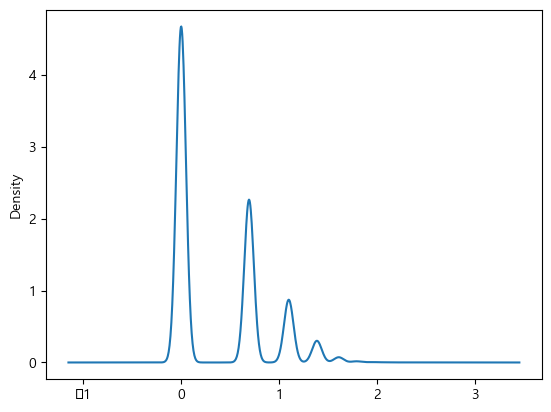

In [60]:
apart['거주자 수'].plot(kind='kde');

- 대표나이와 나이는 높은 상관관계를 가지므로 다중공선성 해소를 위해 대표나이만 남기고 로그스케일링 한다

In [63]:
apart[['나이','대표나이','재계약횟수']].corr()

,나이,대표나이,재계약횟수
나이,1.000000,0.959858,0.182826
대표나이,0.959858,1.000000,0.213330
재계약횟수,0.182826,0.213330,1.000000


In [64]:
import numpy as np 
apart['대표나이'] = np.log(apart['대표나이'])


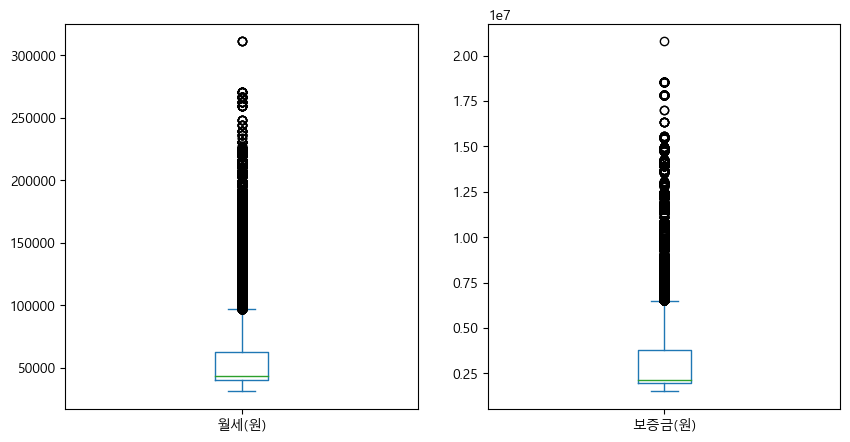

In [67]:
 apart[['월세(원)','보증금(원)']].plot(kind = 'box', subplots = True, layout = (1,2), figsize = (10, 5));

월세와 보증금은 Max이상의 이상치가 크므로 로그변환 후 이상치를 최대값으로 고정한다.

In [74]:
apart['월세(원)'].quantile(0.5)

43600.0

In [75]:
import numpy as np 
apart['월세(원)'] = np.log(apart['월세(원)'])
apart['보증금(원)'] = np.log(apart['보증금(원)'])

def outliers_iqr(dt, col):
    quartile_1, quartile_3 = np.percentile(dt[col], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_whis = quartile_1 - (iqr * 1.5)
    upper_whis = quartile_3 + (iqr * 1.5)
    outliers = dt[(dt[col] > upper_whis) | (dt[col] < lower_whis)]
    return outliers[[col]]
outliers_1 = outliers_iqr(apart,'월세(원)')
outliers_2 = outliers_iqr(apart,'보증금(원)')
len(outliers_1),len(outliers_2)


(4154, 2140)

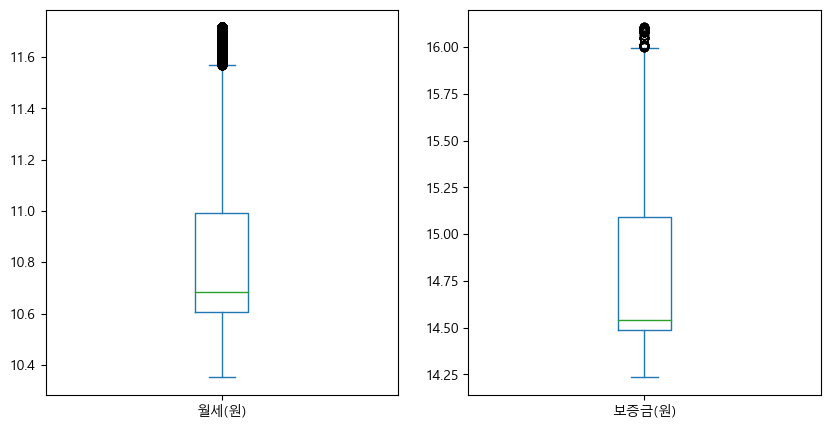

In [92]:
outlier_indices = outliers_1.index.tolist()+outliers_2.index.tolist()

apart.loc[~apart.index.isin(outlier_indices),['월세(원)','보증금(원)']].plot(kind = 'box', subplots = True, layout = (1,2), figsize = (10, 5));

In [93]:
df = apart[~apart.index.isin(outlier_indices)] # 이상이 없으면 저장 사용

##### 2-4. 재계약 횟수의 중앙값을 기준으로 중앙값보다 크거나 같으면 ‘높음’, 작으면 ‘낮음’ 으로 재계약 횟수 이분 변수를 구성하시오.

In [94]:
thre = apart['재계약횟수'].median()
def recontract(x):
    if x>=thre : return '높음'
    else : return '낮음'
apart.loc[:,'재계약횟수이분변수'] = apart['재계약횟수'].apply(recontract)

### 2-5. 차원축소의 필요성을 논하고, 필요에 따라 차원을 축소하고 불필요하다면 그 근거를 논하시오.

- 개별의미를 알기 힘든 센서 등의 비정형 또는 너무 많은 변수가 있어서 의미 해석이 어려운 반정형 데이터의 경우
- 차원 축소를 통해 모델의 정확도를 높히고, 차원의 저주를 없애며 효율화 할 수 있다.
- 하지만 10여개 남짓한 위의 데이터는 년도, 거주자 등 한정된 변수로만 구성되었기에
- 오히려 파생변수 생성 및 이차항 생성 등을 통해 비선형 관계도 풀어줄 수 있도록 만들어주고
- 변수선택법의 방법으로 모델의 정확도를 높여 나가는 것이 바람직하다.

### 2-6. 재계약 횟수 이분변수를 기준으로 세그먼트를 구분하고 각 세그먼트의 특징을 분석하시오.

In [95]:
dr = ['계약자고유번호','아파트 이름','호실고유번호','계약서고유번호','나이']
apart = apart.drop(dr,axis=1)

In [96]:
con1 = apart['재계약횟수이분변수']=='높음'
apart[con1].describe().round()

,거주연도,순번,재계약횟수,거주개월,아파트 ID,아파트 평점,층,평형대,입주연도,퇴거연도,월세(원),보증금(원),대표나이,거주자 수
count,49123.0,49123.0,49123.0,49123.0,49123.0,49123.0,49123.0,49123.0,49123.0,49123.0,49123.0,49123.0,49123.0,49123.0
mean,2014.0,6622.0,9.0,221.0,2.0,6.0,8.0,13.0,2003.0,2017.0,11.0,15.0,4.0,0.0
std,4.0,3798.0,1.0,22.0,1.0,1.0,4.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
min,2008.0,1.0,8.0,158.0,1.0,5.0,1.0,12.0,1994.0,2014.0,10.0,14.0,3.0,0.0
25%,2011.0,3284.0,9.0,210.0,1.0,5.0,4.0,12.0,2002.0,2017.0,11.0,14.0,4.0,0.0
50%,2014.0,6808.0,10.0,222.0,2.0,7.0,8.0,12.0,2003.0,2017.0,11.0,15.0,4.0,0.0
75%,2017.0,9858.0,10.0,234.0,2.0,7.0,11.0,15.0,2003.0,2017.0,11.0,15.0,4.0,1.0
max,2020.0,12882.0,12.0,323.0,5.0,10.0,15.0,19.0,2008.0,2020.0,13.0,17.0,5.0,2.0


재계약 계약횟수가 높은 집단의 경우, 
- 평균 재계약횟수는 9회 적어도 8회 이상은 재계약을 하는 것으로 확인되었다.
- 평균 나이는 62세, 거주자수의 평균은  2명이었다.
- 거주개월은 평균 221개월이며, 짧은 경우도 158개월 이상이었다.
- 여성이 비교적 많으며, 해지된 계약보다 유효한 계약이 많았다.

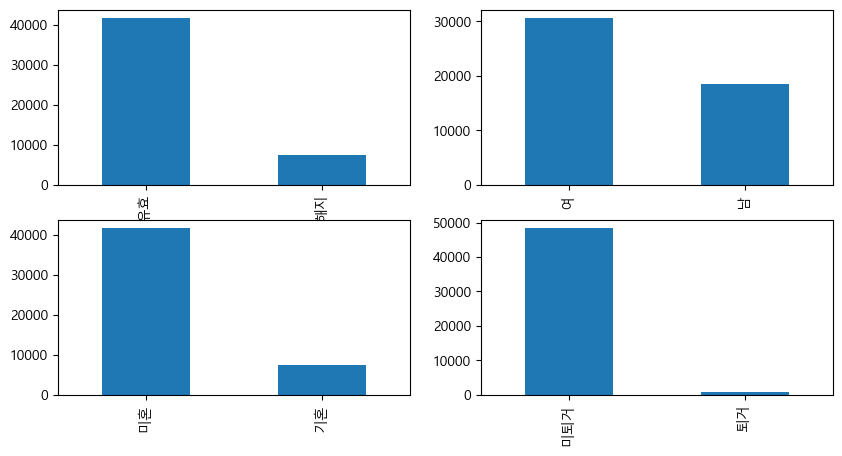

In [97]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig, axes = plt.subplots(2,2, figsize=(10, 5))

for ax, c in zip(axes.flat, ['계약구분', '성별', '결혼여부', '퇴거여부']):
    apart.loc[con1,c].value_counts().plot(kind='bar', ax=ax)

재계약 계약횟수가 낮은 집단의 경우,

- 평균 재계약횟수는 5회로 적게는 1회만 계약을 하는 경우도 있다.
- 평균 나이는 57세로 비교적 적었다, 거주자수의 평균은 2명으로 차이가 없었다
- 거주개월은 평균 113개월이며, 이는 재계약횟수가 높은 집단보다 절반정도의 수치이며,
  짧은 경우는 1개월인 경우도 있었다.
- 남성이 비교적 많으며, 해지된 계약의 수가 거의 유효한 계약의 수만큼 많았다

In [98]:
apart[apart['재계약횟수이분변수']=='낮음'].describe().round()

,거주연도,순번,재계약횟수,거주개월,아파트 ID,아파트 평점,층,평형대,입주연도,퇴거연도,월세(원),보증금(원),대표나이,거주자 수
count,37273.0,37273.0,37273.0,37273.0,37273.0,37273.0,37273.0,37273.0,37273.0,37273.0,37273.0,37273.0,37273.0,37273.0
mean,2014.0,6316.0,5.0,113.0,2.0,6.0,8.0,13.0,2009.0,2016.0,11.0,15.0,4.0,0.0
std,4.0,3668.0,2.0,50.0,1.0,1.0,4.0,2.0,5.0,2.0,0.0,0.0,0.0,1.0
min,2008.0,2.0,1.0,1.0,1.0,5.0,1.0,12.0,1994.0,2008.0,10.0,14.0,3.0,0.0
25%,2011.0,3132.0,3.0,78.0,1.0,5.0,4.0,12.0,2003.0,2015.0,11.0,14.0,4.0,0.0
50%,2014.0,6213.0,5.0,119.0,2.0,7.0,8.0,12.0,2009.0,2017.0,11.0,15.0,4.0,0.0
75%,2017.0,9491.0,6.0,149.0,2.0,7.0,12.0,12.0,2013.0,2017.0,11.0,15.0,4.0,1.0
max,2020.0,12883.0,7.0,322.0,5.0,10.0,15.0,19.0,2020.0,2020.0,12.0,17.0,5.0,2.0


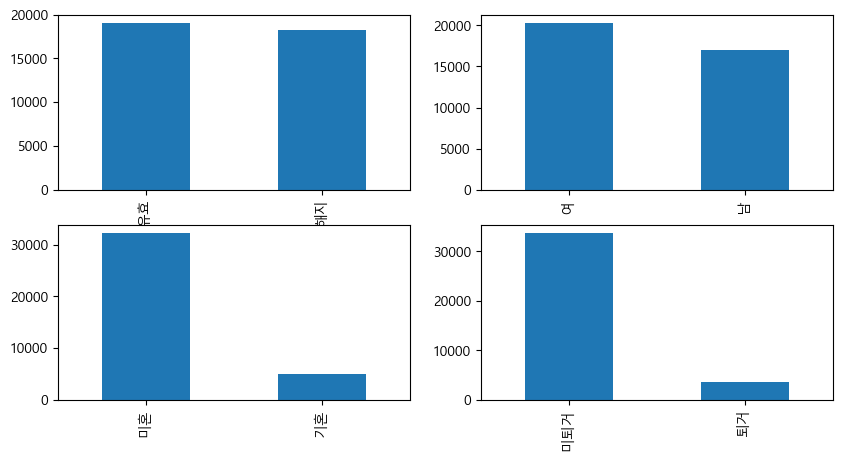

In [99]:
con2 = apart['재계약횟수이분변수']=='낮음'
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig, axes = plt.subplots(2,2, figsize=(10, 5))

for ax, c in zip(axes.flat, ['계약구분', '성별', '결혼여부', '퇴거여부']):
    apart.loc[con2,c].value_counts().plot(kind='bar', ax=ax)

### 2-7. 재계약횟수 변수를 종속변수로 하는 회귀 분석을 두 가지 이상의 방법론을 통해 수행하고 최종 모델을 결정하시오.

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import QuantileRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from time import time

# # 이상치 효과 줄이기 위하여 로그화
# log = ['월세(원)','보증금(원)','대표나이','나이']
# for c in log:
#     apart.loc[:,c] = apart[c].apply(lambda x: np.log(x))

X = apart.drop(['재계약횟수', '재계약횟수이분변수','계약구분'], axis=1)
y = apart['재계약횟수'].values
X_dummy = pd.get_dummies(X,drop_first=True,dtype=float)

# 회귀모델이므로 스케일링 진행하여 정규화
scaler = StandardScaler()
X_s = scaler.fit_transform(X_dummy)
X_train,X_test,y_train, y_test = train_test_split(X_s,y,train_size=0.2,random_state=1)

lr = LinearRegression()
rf = RandomForestRegressor()
models = [lr,rf]
names = ['LinearRegression','RandomForestRegressor']

for i, m in enumerate(models):
    s= time()
    m.fit(X_train,y_train)
    preds = m.predict(X_test)
    e=time()
    t = e-s
    print(f'--{names[i]}--')
    print('mse',mean_squared_error(y_test,preds))
    print('r2_score',r2_score(y_test,preds))    
    print(f'걸린시간 : {t:.4f}\n')         
    

--LinearRegression--
mse 0.7214852619797866
r2_score 0.9052063475569254
걸린시간 : 0.0174

--RandomForestRegressor--
mse 0.16208230391944095
r2_score 0.9787045219153171
걸린시간 : 12.1413



- 앙상블기법의 랜덤포레스트리그레션이 시간은 다소 더 걸리나 결정계수가 많이 향상되는 것을 확인하였다.
- 모델의 목적성에 따라 선택을 다르게 한다. 시간에 대한 제약조건은 없었으므로 보다 정확한 랜덤포레스트 사용

### 2-8. 최종 채택한 모델에서 각각 유의하게 작용하는 변수를 확인 하고 설명하시오

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(X.columns,m.feature_importances_)

거주개월이 가장 크게 영향을 미치는 것을 확인

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_dummy.values, i) for i in range(X_dummy.shape[1])]
vif["features"] = X_dummy.columns
vif[['features','VIF Factor']].sort_values('VIF Factor',ascending=False)
vif[vif['VIF Factor']>30]

다중공선성 제거를 위해 30이상은 제외

### 2-9. 해당 데이터 분석결과로 얻을 수 있는 점 제시